<a href="https://colab.research.google.com/github/MajoSedCast/Analisis-aplicado-fall2020/blob/master/157500_parcial1_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Código

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data.csv


In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

In [ ]:
crimen=pd.read_csv('crime_data.csv')
print(crimen)

                  crime        date   hour        lat       long
0             VIOLACION  2020-09-30  07:20  19.318714 -99.254418
1             VIOLACION  2020-09-29  22:30  19.378762 -99.205488
2             VIOLACION  2020-09-29  22:00  19.347971 -99.030162
3             VIOLACION  2020-09-29  23:30  19.557311 -99.134166
4             VIOLACION  2020-09-27  00:00  19.342125 -99.124280
...                 ...         ...    ...        ...        ...
31051  HOMICIDIO DOLOSO  2019-10-04  07:35  19.445910 -99.107260
31052  HOMICIDIO DOLOSO  2019-10-04  20:28  19.434710 -99.123860
31053  HOMICIDIO DOLOSO  2019-10-04  14:40  19.401840 -99.137230
31054  HOMICIDIO DOLOSO  2019-10-02  22:55  19.312620 -99.255040
31055  HOMICIDIO DOLOSO  2019-10-01  21:20  19.407780 -99.130580

[31056 rows x 5 columns]


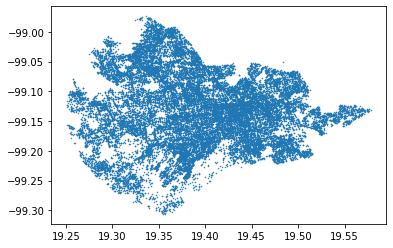

In [ ]:
coord=crimen[['lat','long']].to_numpy()
map=ConvexHull(coord)
plt.plot(coord[:,0],coord[:,1],'o',markersize=0.5,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


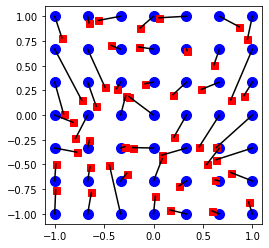

In [ ]:
#Buscamos minimizar distancias entre puntos de forma
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment

np.random.seed(100)

points1 = np.array([(x, y) for x in np.linspace(-1,1,7) for y in np.linspace(-1,1,7)])
N = points1.shape[0]
points2 = 2*np.random.rand(N,2)-1

C = cdist(points1, points2)

_, assigment = linear_sum_assignment(C)

plt.plot(points1[:,0], points1[:,1],'bo', markersize = 10)
plt.plot(points2[:,0], points2[:,1],'rs',  markersize = 7)
for p in range(N):
    plt.plot([points1[p,0], points2[assigment[p],0]], [points1[p,1], points2[assigment[p],1]], 'k')
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.axes().set_aspect('equal')